The following notebook generates the plots in figure 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import notebook_utils as utils

The following generates the theoretical ks for each number of leaves n.

In [2]:
lb_arr = []
q = 0.05
p = 0.5

for n in range(3, 13):
    ell = 1/(n)
    lb_arr.append(utils.top_down_theory_bound(p,q,ell,2**(n-1), 1, 0.1))
    
lb_arr2 = []
q = 0.05
p = 0.5

for n in range(3, 13):
    ell = 1/(n)
    lb_arr2.append(utils.bottom_up_theory_bound(p,q,ell,2**(n-1), ell, 0.1))

The following generates the plot varying n, the number of leaves, for the Threshold Algorithm. We ensure that for the chosen constant c, that the theoretical ks upper bound the simulated ks for all values of n.

number of indices where the theoretical k > uniform simulation k: 10


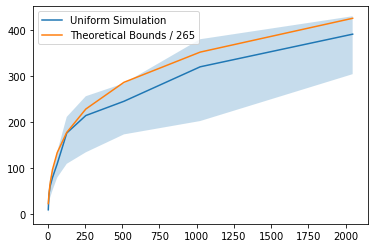

In [7]:
c = 265

table = pd.read_csv("../results/vary_n/complete_binary/percolation_rf.txt", sep = "\t", header = None)
table = table.drop(columns= [0,1]).set_index(3)
table.index.names=["depth"]
table.columns = [2, 3]
ks = table.groupby(["depth"]).apply(utils.logistic_spline).to_frame()
ks = list(ks[0].values)
lowers = table.groupby(["depth"]).apply(utils.find_lower_bound).to_frame()
lowers = list(lowers[0].values)
uppers = table.groupby(["depth"]).apply(utils.find_upper_bound).to_frame()
uppers = list(uppers[0].values)

plt.plot([2**(n-1) for n in range(3, 13)], [i for i in ks])
plt.fill_between([2**(n-1) for n in range(3, 13)], [i for i in lowers], [i for i in uppers], alpha = 0.25)
plt.plot([2**(n-1) for n in range(3, 13)], [i/c for i in lb_arr])
print("number of indices where the theoretical k > uniform simulation k:", 
      sum([ks[i] < lb_arr[i]/c for i in range(len(ks))]))
logs = [np.log(2**(n-1))**2 for n in range(3, 13)]
plt.legend(["Uniform Simulation", f"Theoretical Bounds / {c}"])
plt.savefig("../Figures/Fig6/percolation.pdf", format='pdf')
plt.show()

The following generates the plot varying n, the number of leaves, for the Bottom-Up Algorithm. We ensure that for the chosen constant c, that the theoretical ks upper bound the simulated ks for all values of n. We replace the first two values (at n = 4, 8) with 2 as in the data the trees is already perfectly resolved with only 2 characters.

number of indices where the theoretical k > uniform simulation k: 10


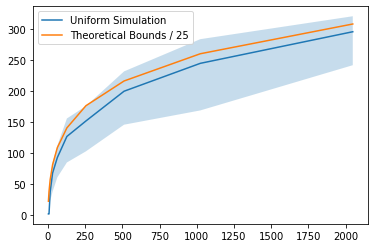

In [9]:
c = 25

table = pd.read_csv("/data/yosef2/users/richardz/projects/theory_paper_sims/results/vary_n/complete_binary/shared_mutation_rf.txt", sep = "\t", header = None)
table = table.drop(columns= [0,1]).set_index(3)
table.index.names=["depth"]
table.columns = [2, 3]
ks = table.groupby(["depth"]).apply(utils.logistic_spline).to_frame()
ks = list(ks[0].values)
ks[0] = 2
ks[1] = 2
lowers = table.groupby(["depth"]).apply(utils.find_lower_bound).to_frame()
lowers = list(lowers[0].values)
uppers = table.groupby(["depth"]).apply(utils.find_upper_bound).to_frame()
uppers = list(uppers[0].values)

plt.plot([2**(n-1) for n in range(3, 13)], [i for i in ks]) 
plt.fill_between([2**(n-1) for n in range(3, 13)], [i for i in lowers], [i for i in uppers], alpha = 0.25)
plt.plot([2**(n-1) for n in range(3, 13)], [i/c for i in lb_arr2])
print("number of indices where the theoretical k > uniform simulation k:", 
      sum([ks[i] < lb_arr2[i]/c for i in range(len(ks))]))
plt.legend(["Uniform Simulation", f"Theoretical Bounds / {c}"])
plt.savefig("../Figures/Fig6/shared_mutation.pdf", format='pdf')